In [ ]:

from IPython.core.display import display, HTML, Javascript

color_map = ['#8A0030', '#BA1141']

prompt = color_map[-1]
main_color = color_map[0]
strong_main_color = color_map[1]
custom_colors = [strong_main_color, main_color]

css_file = '''
div #notebook {
background-color: white;
line-height: 20px;
}

#notebook-container {
%s
margin-top: 2em;
padding-top: 2em;
border-top: 4px solid %s;
-webkit-box-shadow: 0px 0px 8px 2px rgba(224, 212, 226, 0.5);
    box-shadow: 0px 0px 8px 2px rgba(224, 212, 226, 0.5);
}

div .input {
margin-bottom: 1em;
}

.rendered_html h1, .rendered_html h2, .rendered_html h3, .rendered_html h4, .rendered_html h5, .rendered_html h6 {
color: %s;
font-weight: 600;
}

div.input_area {
border: none;
    background-color: %s;
    border-top: 2px solid %s;
}

div.input_prompt {
color: %s;
}

div.output_prompt {
color: %s;
}

div.cell.selected:before, div.cell.selected.jupyter-soft-selected:before {
background: %s;
}

div.cell.selected, div.cell.selected.jupyter-soft-selected {
    border-color: %s;
}

.edit_mode div.cell.selected:before {
background: %s;
}

.edit_mode div.cell.selected {
border-color: %s;

}
'''

def to_rgb(h):
    return tuple(int(h[i:i+2], 16) for i in [0, 2, 4])

main_color_rgba = 'rgba(%s, %s, %s, 0.1)' % (to_rgb(main_color[1:]))
open('notebook.css', 'w').write(css_file % ('width: 95%;', main_color, main_color, main_color_rgba, main_color,  main_color, prompt, main_color, main_color, main_color, main_color))

def nb():
    return HTML("<style>" + open("notebook.css", "r").read() + "</style>")
nb()

In [ ]:
# --- Importing Libraries ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import yellowbrick
import pickle
from matplotlib.collections import PathCollection
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC, ConfusionMatrix
from yellowbrick.style import set_palette
from yellowbrick.model_selection import LearningCurve, FeatureImportances
from yellowbrick.contrib.wrapper import wrap

# --- Libraries Settings ---
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.dpi']=100
set_palette('dark')

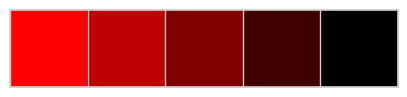

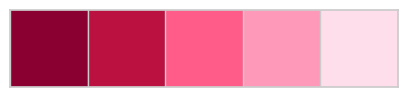

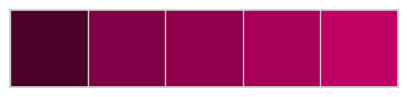

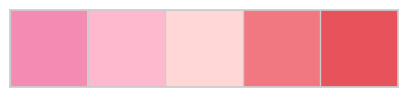

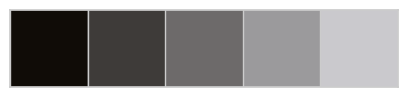

In [ ]:
# --- Create List of Color Palletes ---
red_grad = ['#FF0000', '#BF0000', '#800000', '#400000', '#000000']
pink_grad = ['#8A0030', '#BA1141', '#FF5C8A', '#FF99B9', '#FFDEEB']
purple_grad = ['#4C0028', '#7F0043', '#8E004C', '#A80059', '#C10067']
color_mix = ['#F38BB2', '#FFB9CF', '#FFD7D7', '#F17881', '#E7525B']
black_grad = ['#100C07', '#3E3B39', '#6D6A6A', '#9B9A9C', '#CAC9CD']

# --- Plot Color Palletes --
sns.palplot(red_grad)
sns.palplot(pink_grad)
sns.palplot(purple_grad)
sns.palplot(color_mix)
sns.palplot(black_grad)

In [ ]:
# --- Importing Dataset ---
df = pd.read_csv("/finaldataset.csv")

# --- Reading Dataset ---
df.head().style.background_gradient(cmap='Reds').set_properties(**{'font-family': 'Segoe UI'}).hide_index()

bp_withphone,bp_withoutphone,age,gender,hr_withphone,hr_withoutphone,theta_easy,lower_alpha_easy,theta_hard,lower_alpha_hard,Drivers_performance
115,124,31,F,68,65,2790000.000000,2980000.000000,3140000.000000,3460000.000000,1
100,96,28,F,67,63,3680000.000000,3300000.000000,3960000.000000,3850000.000000,0
114,118,26,F,79,81,983000.000000,496000.000000,998000.000000,593000.000000,0
129,127,62,M,60,55,3390000.000000,4450000.000000,4980000.000000,5480000.000000,1
134,131,60,F,76,75,3640000.000000,4650000.000000,4540000.000000,2730000.000000,1


In [ ]:
df.age

0      31
1      28
2      26
3      62
4      60
       ..
209    84
210    82
211    80
212    80
213    83
Name: age, Length: 214, dtype: int64

In [ ]:
# --- Print Dataset Info ---
print('\033[1m'+'.: Dataset Info :.'+'\033[0m')
print('*' * 30)
print('Total Rows:'+'\033[1m', df.shape[0])
print('\033[0m'+'Total Columns:'+'\033[1m', df.shape[1])
print('\033[0m'+'*' * 30)
print('\n')

.: Dataset Info :.
******************************
Total Rows: 214
Total Columns: 11
******************************




In [ ]:
# --- Print Dataset Detail ---
print('\033[1m'+'.: Dataset Details :.'+'\033[0m')
print('*' * 30)
df.info(memory_usage = False)

.: Dataset Details :.
******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   bp_withphone         214 non-null    int64  
 1   bp_withoutphone      214 non-null    int64  
 2   age                  214 non-null    int64  
 3   gender               214 non-null    object 
 4   hr_withphone         214 non-null    int64  
 5   hr_withoutphone      214 non-null    int64  
 6   theta_easy           214 non-null    float64
 7   lower_alpha_easy     214 non-null    float64
 8   theta_hard           214 non-null    float64
 9   lower_alpha_hard     214 non-null    float64
 10  Drivers_performance  214 non-null    int64  
dtypes: float64(4), int64(6), object(1)

*************************
.: Sex (Gender) Total :.
*************************


F    127
M     87
Name: gender, dtype: int64

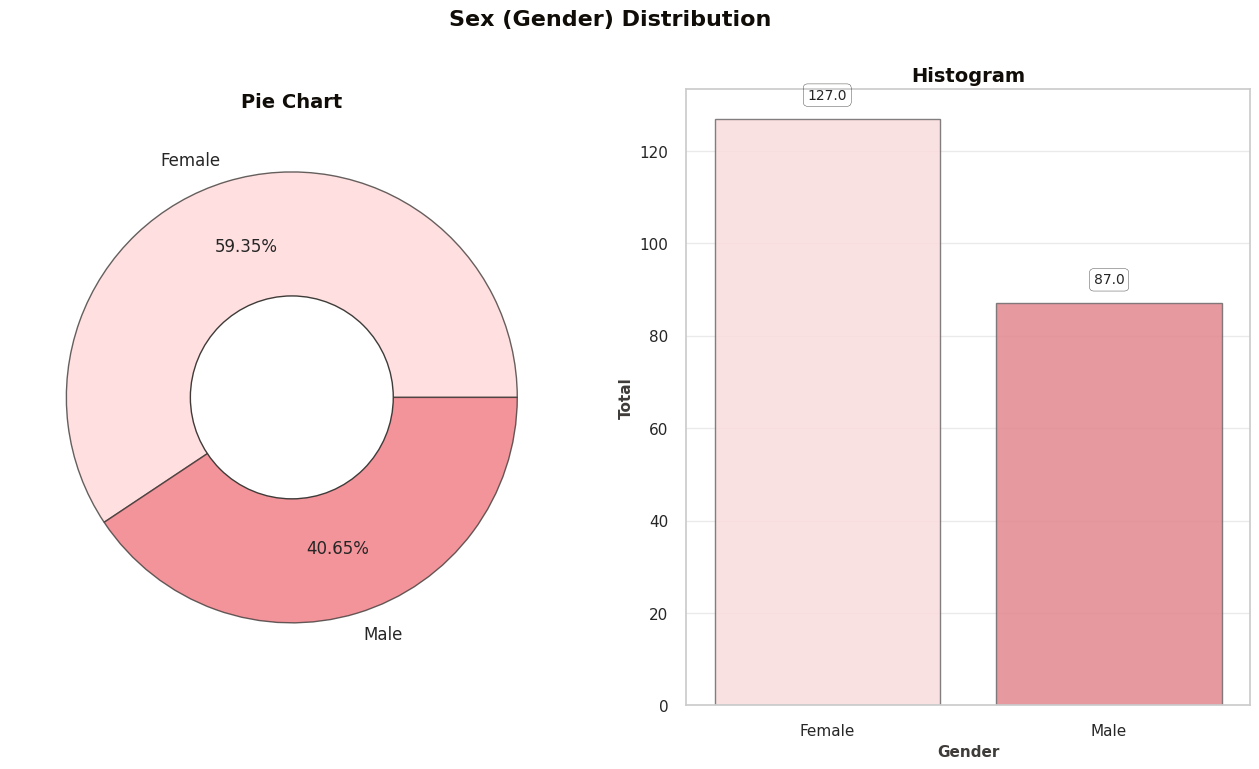

In [ ]:
# --- Setting Colors, Labels, Order ---
colors=color_mix[2:4]
labels=['Female', 'Male']
order=df['gender'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Sex (Gender) Distribution', fontweight='heavy',
             fontsize='16', fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14,
          fontfamily='sans-serif', color=black_grad[0])
plt.pie(df['gender'].value_counts(), labels=labels, colors=colors, pctdistance=0.7,
        autopct='%.2f%%', wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]),
        textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14,
          fontfamily='sans-serif', color=black_grad[0])
ax = sns.countplot(x='gender', data=df, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2,
             rect.get_height()+4.25,rect.get_height(),
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=black_grad[0],
                       linewidth=0.25, boxstyle='round'))

plt.xlabel('Gender', fontweight='bold', fontsize=11, fontfamily='sans-serif',
           color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif',
           color=black_grad[1])
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 25)
print('\033[1m'+'.: Sex (Gender) Total :.'+'\033[0m')
print('*' * 25)
df.gender.value_counts(dropna=False)

.: Age Column Skewness & Kurtosis :.
****************************************
Skewness: 0.756
Kurtosis: -0.171




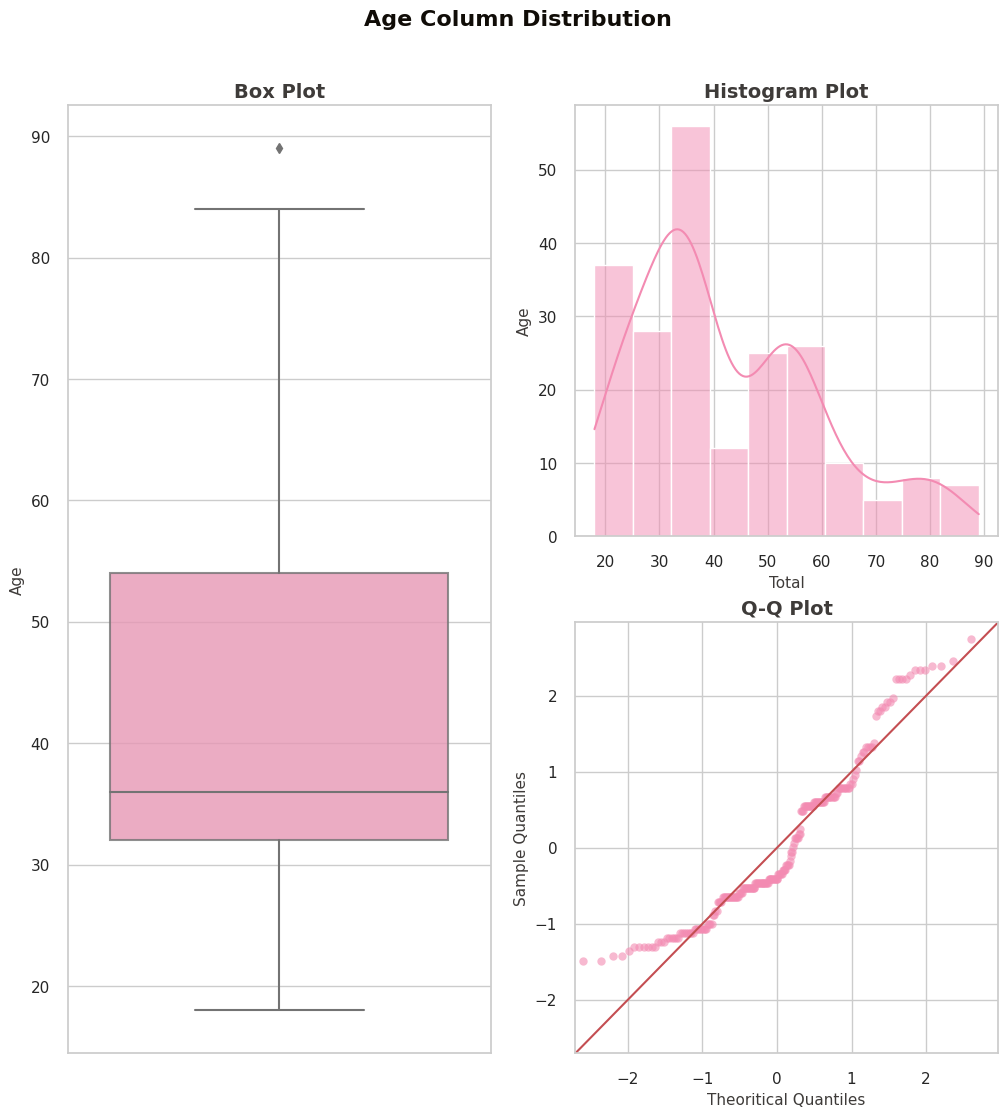

In [ ]:
# --- Variable, Color & Plot Size ---
var = 'age'
color = color_mix[0]
fig=plt.figure(figsize=(12, 12))

# --- Skewness & Kurtosis ---
print('\033[1m'+'.: Age Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 40)
print('Skewness:'+'\033[1m {:.3f}'.format(df[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(df[var].kurt(axis = 0, skipna = True)))
print('\n')

# --- General Title ---
fig.suptitle('Age Column Distribution', fontweight='bold', fontsize=16,
             fontfamily='sans-serif', color=black_grad[0])
fig.subplots_adjust(top=0.9)

# --- Histogram ---
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14,
          fontfamily='sans-serif', color=black_grad[1])
sns.histplot(data=df, x=var, kde=True, color=color)
plt.xlabel('Total', fontweight='regular', fontsize=11,
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Age', fontweight='regular', fontsize=11, fontfamily='sans-serif',
           color=black_grad[1])

# --- Q-Q Plot ---
ax_2=fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14,
          fontfamily='sans-serif', color=black_grad[1])
qqplot(df[var], fit=True, line='45', ax=ax_2, markerfacecolor=color,
       markeredgecolor=color, alpha=0.6)
plt.xlabel('Theoritical Quantiles', fontweight='regular', fontsize=11,
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Sample Quantiles', fontweight='regular', fontsize=11,
           fontfamily='sans-serif', color=black_grad[1])

# --- Box Plot ---
ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif',
          color=black_grad[1])
sns.boxplot(data=df, y=var, color=color, boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('Age', fontweight='regular', fontsize=11, fontfamily='sans-serif',
           color=black_grad[1])

plt.show()

In [ ]:
df['age'].describe()

count    214.000000
mean      42.869159
std       16.806317
min       18.000000
25%       32.000000
50%       36.000000
75%       54.000000
max       89.000000
Name: age, dtype: float64

In [ ]:
df[["gender", "age"]].groupby("gender").mean()
#Average age related to gender

,age
gender,
F,42.708661
M,43.103448


In [ ]:
total_columns = df.columns
# store numerical and categorical column in two different variables. It comes handy during visualizaion.
num_col = df._get_numeric_data().columns
cat_col = list(set(total_columns)-set(num_col))


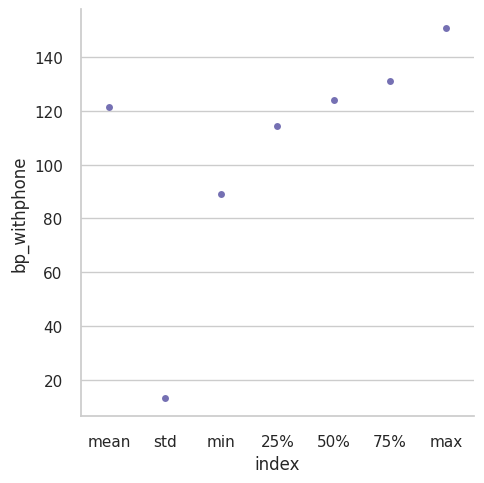

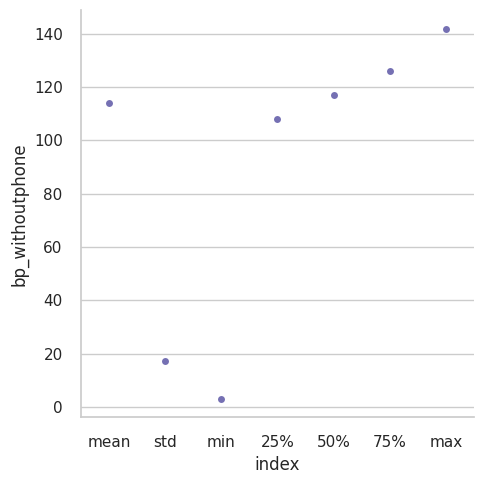

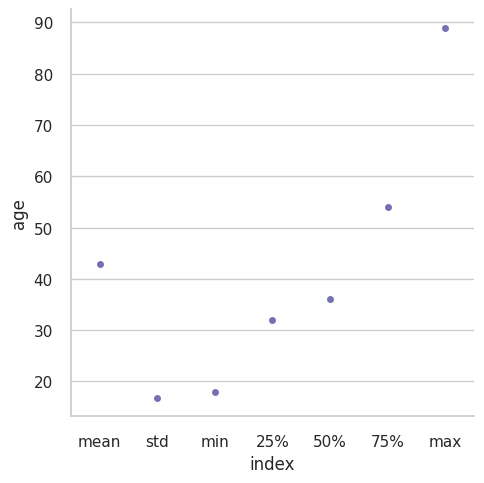

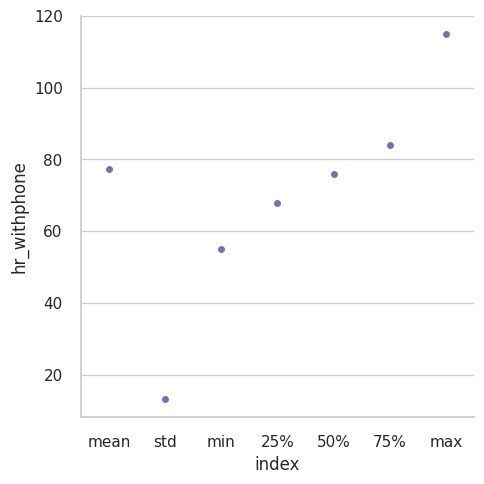

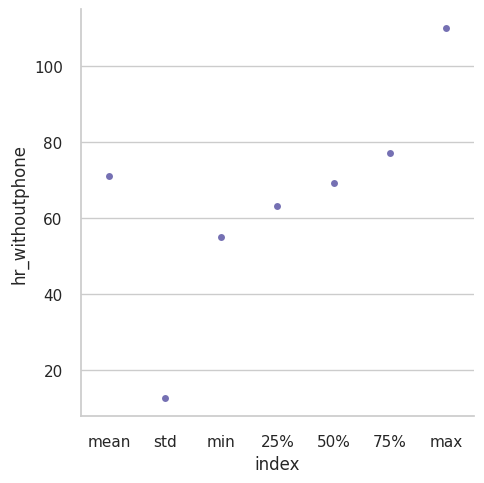

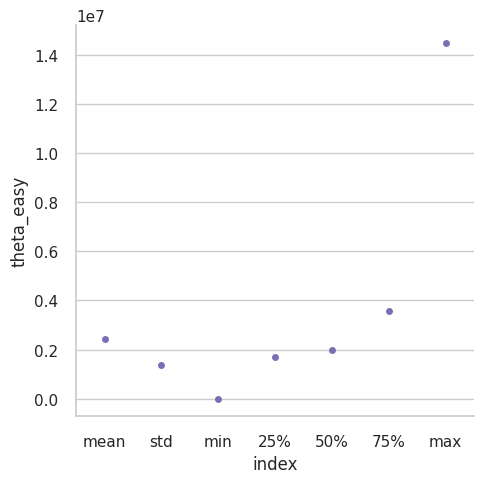

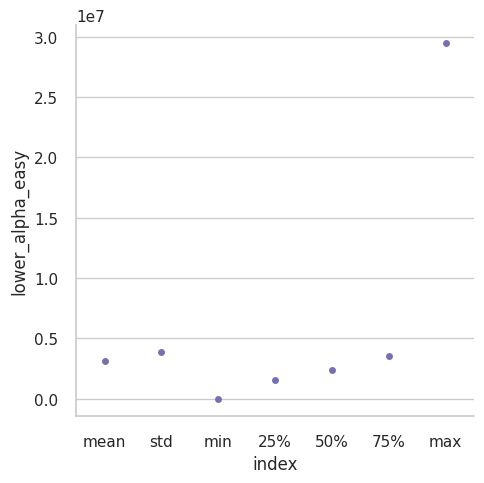

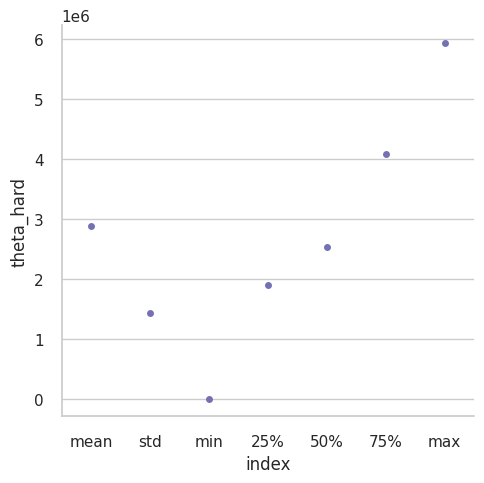

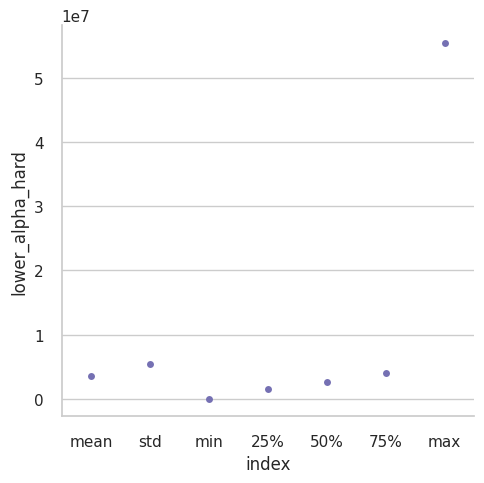

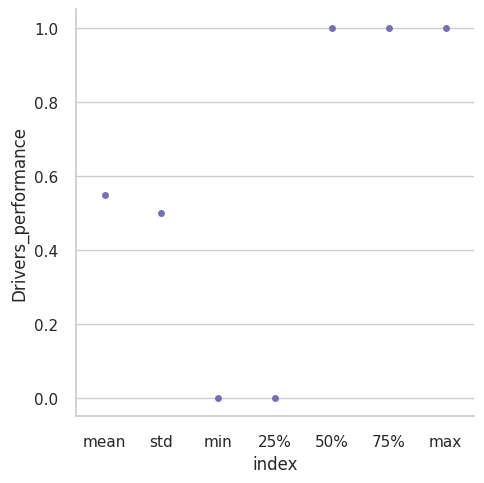

In [ ]:
describe_num_df = df.describe()
describe_num_df.reset_index(inplace=True)
# To remove any variable from plot
describe_num_df = describe_num_df[describe_num_df['index'] != 'count']
for i in num_col:
  if i in ['index']:
    continue
  sns.catplot(x='index', y=i, data=describe_num_df)
  plt.show()

In [ ]:
df.head()

,bp_withphone,bp_withoutphone,age,gender,hr_withphone,hr_withoutphone,theta_easy,lower_alpha_easy,theta_hard,lower_alpha_hard,Drivers_performance
0,115,124,31,F,68,65,2790000.0,2980000.0,3140000.0,3460000.0,1
1,100,96,28,F,67,63,3680000.0,3300000.0,3960000.0,3850000.0,0
2,114,118,26,F,79,81,983000.0,496000.0,998000.0,593000.0,0
3,129,127,62,M,60,55,3390000.0,4450000.0,4980000.0,5480000.0,1
4,134,131,60,F,76,75,3640000.0,4650000.0,4540000.0,2730000.0,1


In [ ]:
age = pd.cut(df['age'], [0, 10,20, 30,40,50, 60,80])
result = df.pivot_table('age', index=['gender'], columns='Drivers_performance', aggfunc='count')
print(result)



Drivers_performance   0   1
gender                     
F                    56  71
M                    41  46


In [ ]:
df.isna().sum()

bp_withphone           0
bp_withoutphone        0
age                    0
gender                 0
hr_withphone           0
hr_withoutphone        0
theta_easy             0
lower_alpha_easy       0
theta_hard             0
lower_alpha_hard       0
Drivers_performance    0
dtype: int64

In [ ]:
 df.columns

Index(['bp_withphone', 'bp_withoutphone', 'age', 'gender', 'hr_withphone',
       'hr_withoutphone', 'theta_easy', 'lower_alpha_easy', 'theta_hard',
       'lower_alpha_hard', 'Drivers_performance'],
      dtype='object')

<BarContainer object of 214 artists>

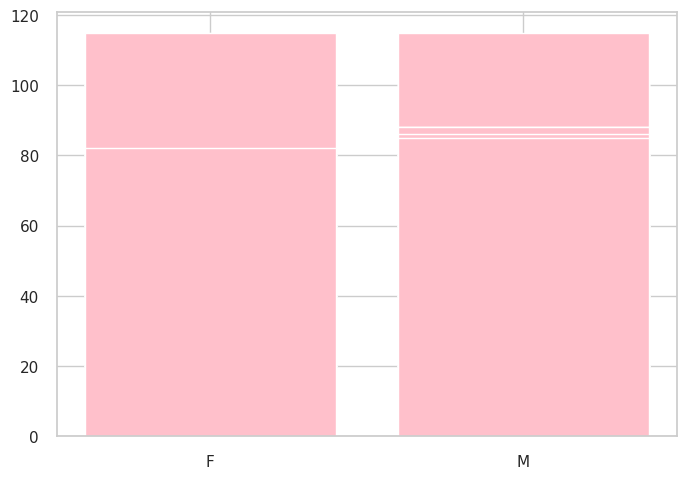

In [ ]:
plt.bar(df['gender'], df['hr_withphone'], color='pink')

<BarContainer object of 214 artists>

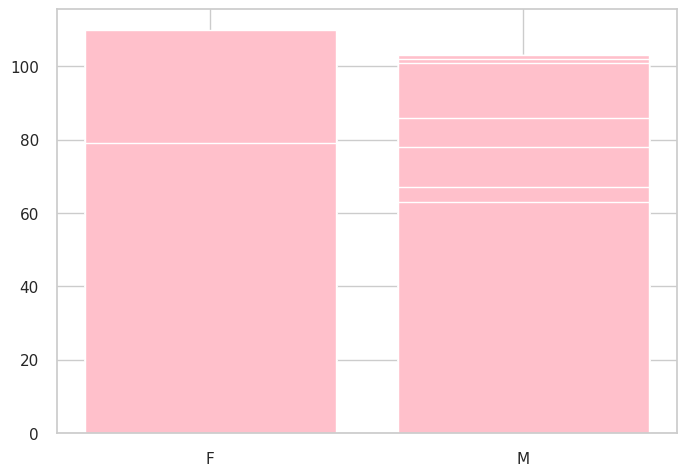

In [ ]:
plt.bar(df['gender'], df['hr_withoutphone'], color='pink')

In [ ]:
df.columns

Index(['bp_withphone', 'bp_withoutphone', 'age', 'gender', 'hr_withphone',
       'hr_withoutphone', 'theta_easy', 'lower_alpha_easy', 'theta_hard',
       'lower_alpha_hard', 'Drivers_performance'],
      dtype='object')

*********************************************
.: Drivers_performance Status (Drivers_performance) Total :.
*********************************************


1    117
0     97
Name: Drivers_performance, dtype: int64

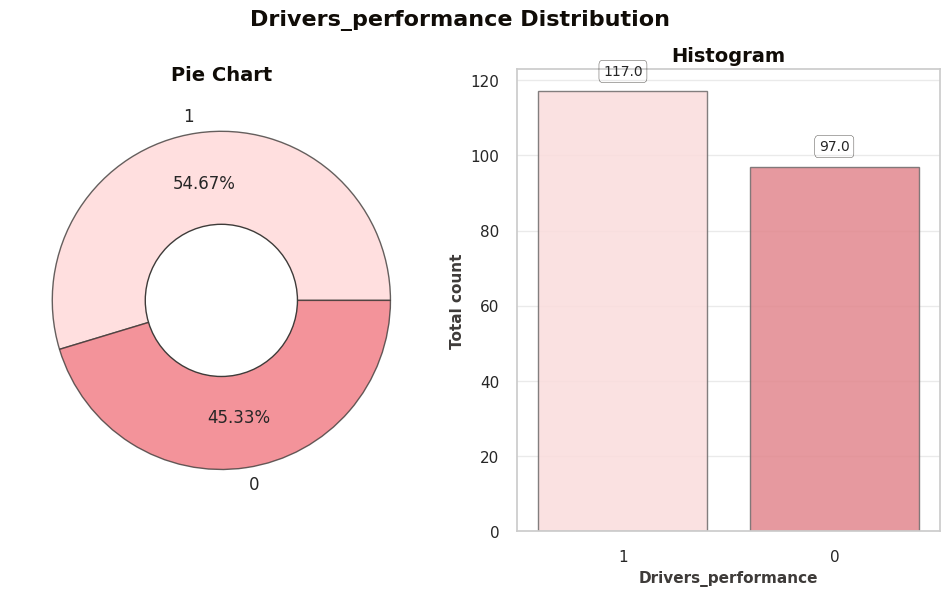

In [ ]:
# --- Setting Colors, Labels, Order ---
colors=color_mix[2:4]
labels=['1', '0']
order=df['Drivers_performance'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(12,6))
plt.suptitle('Drivers_performance Distribution', fontweight='heavy',
             fontsize=16, fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif',
          color=black_grad[0])
plt.pie(df['Drivers_performance'].value_counts(), labels=labels, colors=colors,
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), autopct='%.2f%%',
        pctdistance=0.7, textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif',
          color=black_grad[0])
ax = sns.countplot(x='Drivers_performance', data=df, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2,
             rect.get_height()+4.25,rect.get_height(),
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Drivers_performance', fontweight='bold', fontsize=11,
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Total count', fontweight='bold', fontsize=11, fontfamily='sans-serif',
           color=black_grad[1])
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 45)
print('\033[1m'+'.: Drivers_performance Status (Drivers_performance) Total :.'+'\033[0m')
print('*' * 45)
df.Drivers_performance.value_counts(dropna=False)

In [ ]:
corr_df=df[['age','hr_withphone','hr_withoutphone','gender','Drivers_performance']]

**Correlation Map**

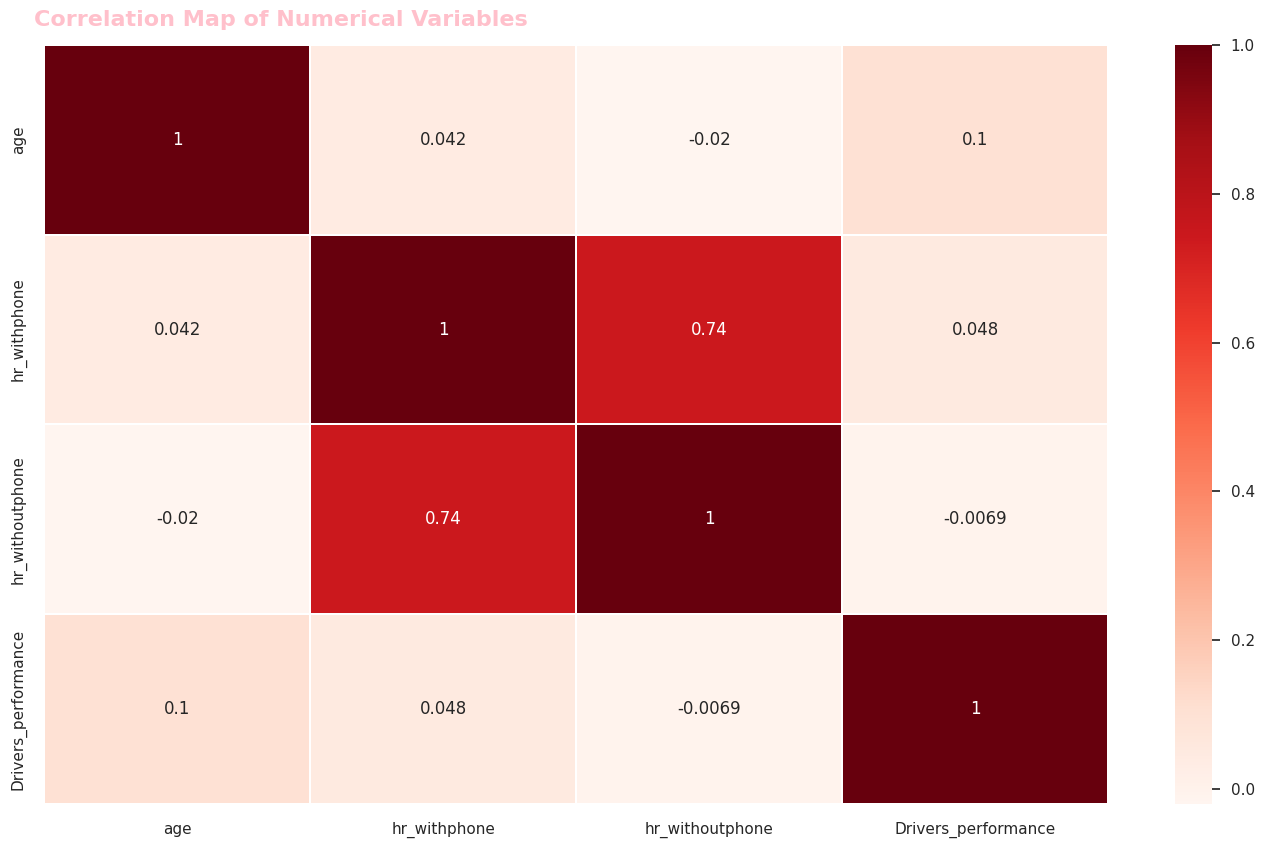

In [ ]:
# --- Correlation Map (Heatmap)
plt.figure(figsize=(14, 9))
sns.heatmap(corr_df.corr(), annot=True, cmap='Reds', linewidths=0.1)
plt.suptitle('Correlation Map of Numerical Variables', fontweight='heavy',
             x=0.03, y=0.98, ha='left', fontsize='16', fontfamily='sans-serif',
             color='pink')

plt.tight_layout(rect=[0, 0.04, 1, 1.01])

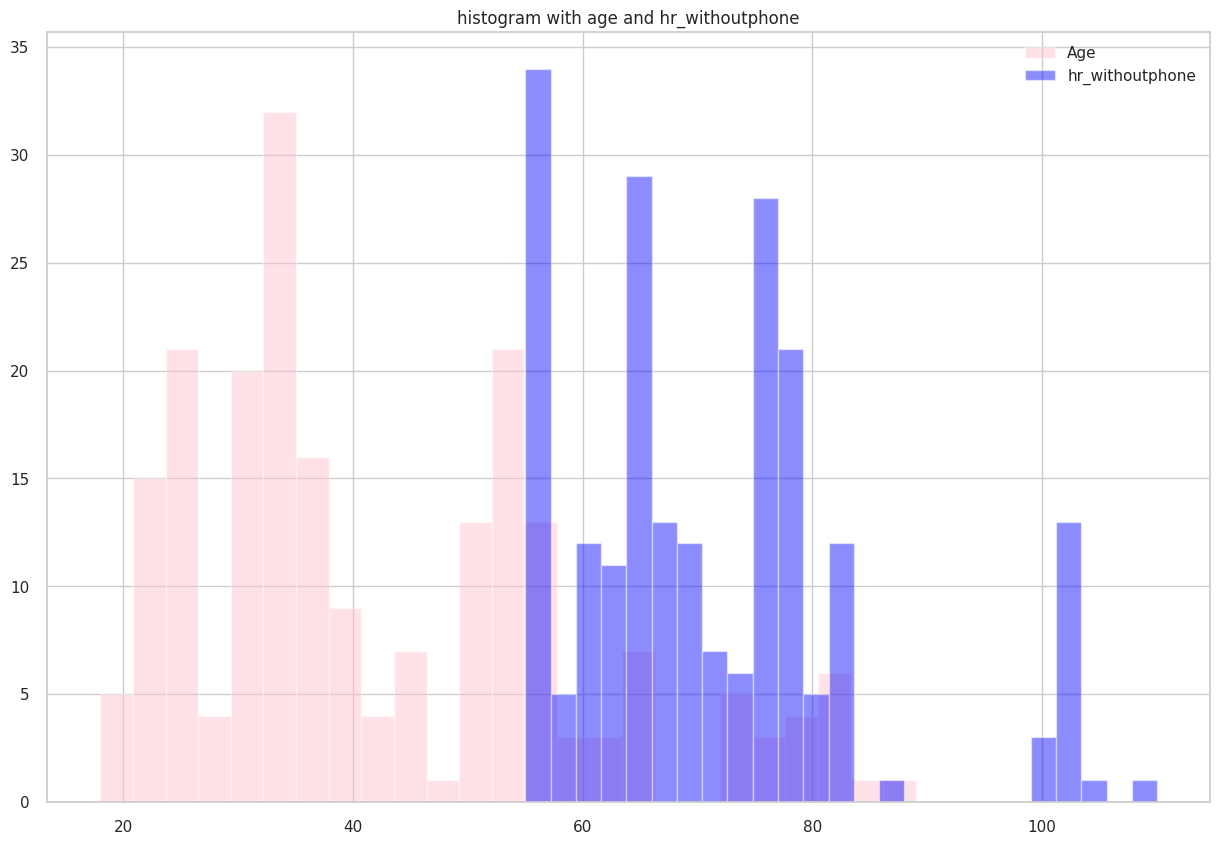

In [ ]:

fig = plt.figure(figsize=(15, 10))
plt.hist(df['age'], bins=25, alpha=0.45, color='pink')
plt.hist(df['hr_withoutphone'], bins=25, alpha=0.45, color='blue')

plt.title("histogram with age \
and hr_withoutphone")

plt.legend(['Age',
            'hr_withoutphone'])

plt.show()

<Axes: xlabel='hr_withphone', ylabel='age'>

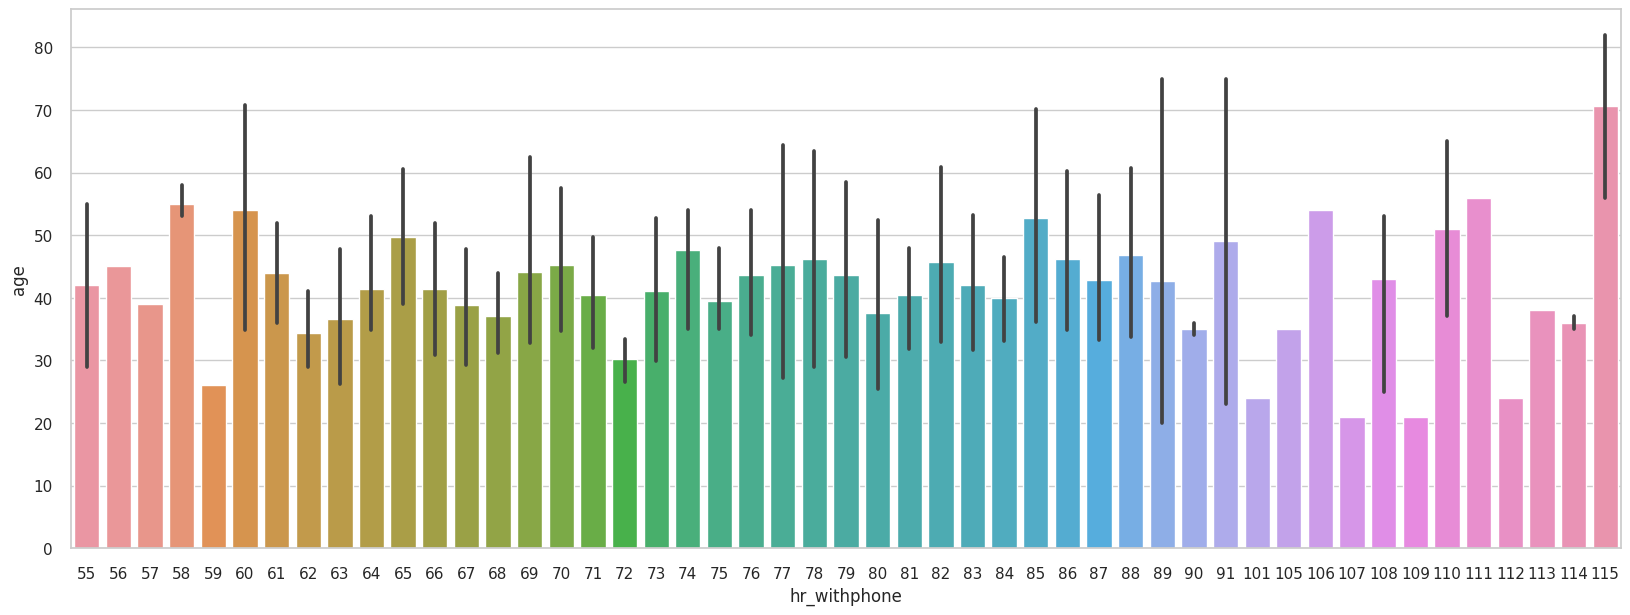

In [ ]:
a4_dims = (20, 7)

fig, ax = plt.subplots(figsize=a4_dims)

sns.barplot(x='hr_withphone', y='age',ax=ax, data=df)

<Axes: xlabel='hr_withoutphone', ylabel='age'>

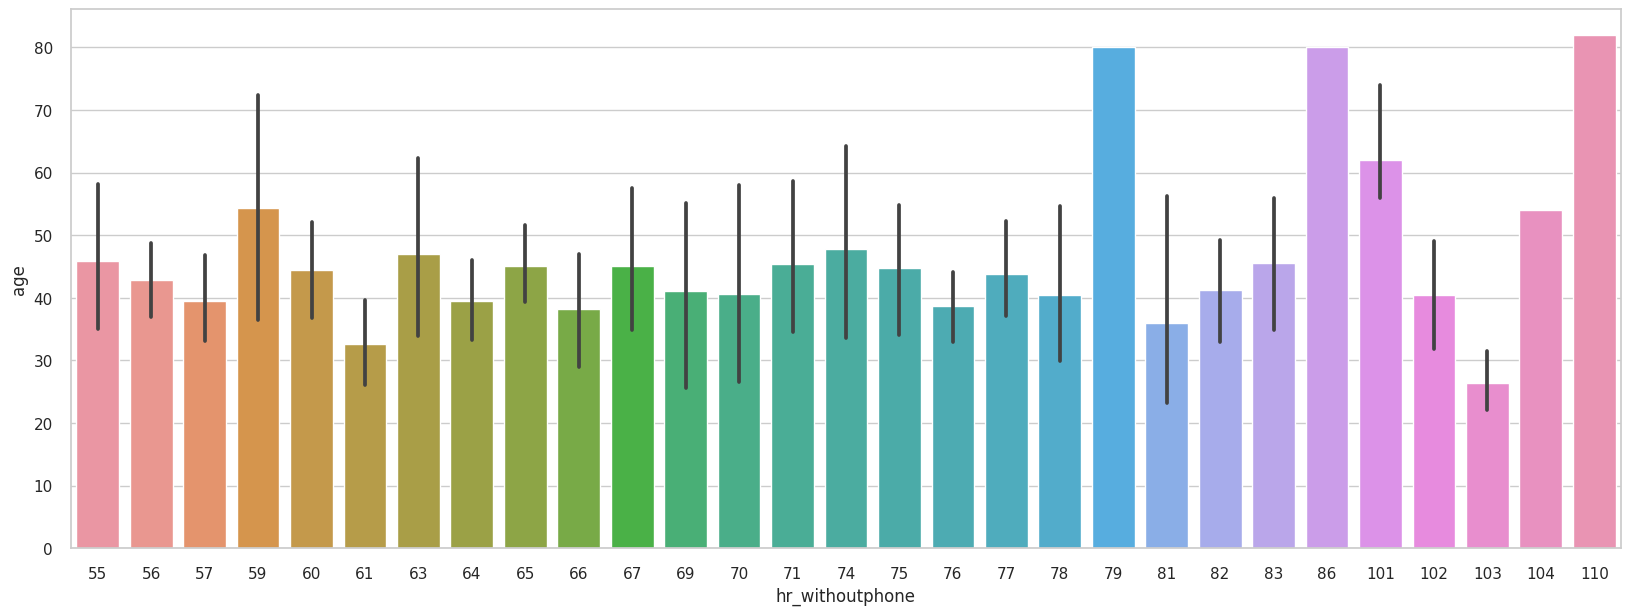

In [ ]:
a4_dims = (20, 7)

fig, ax = plt.subplots(figsize=a4_dims)

sns.barplot(x='hr_withoutphone', y='age',ax=ax, data=df)

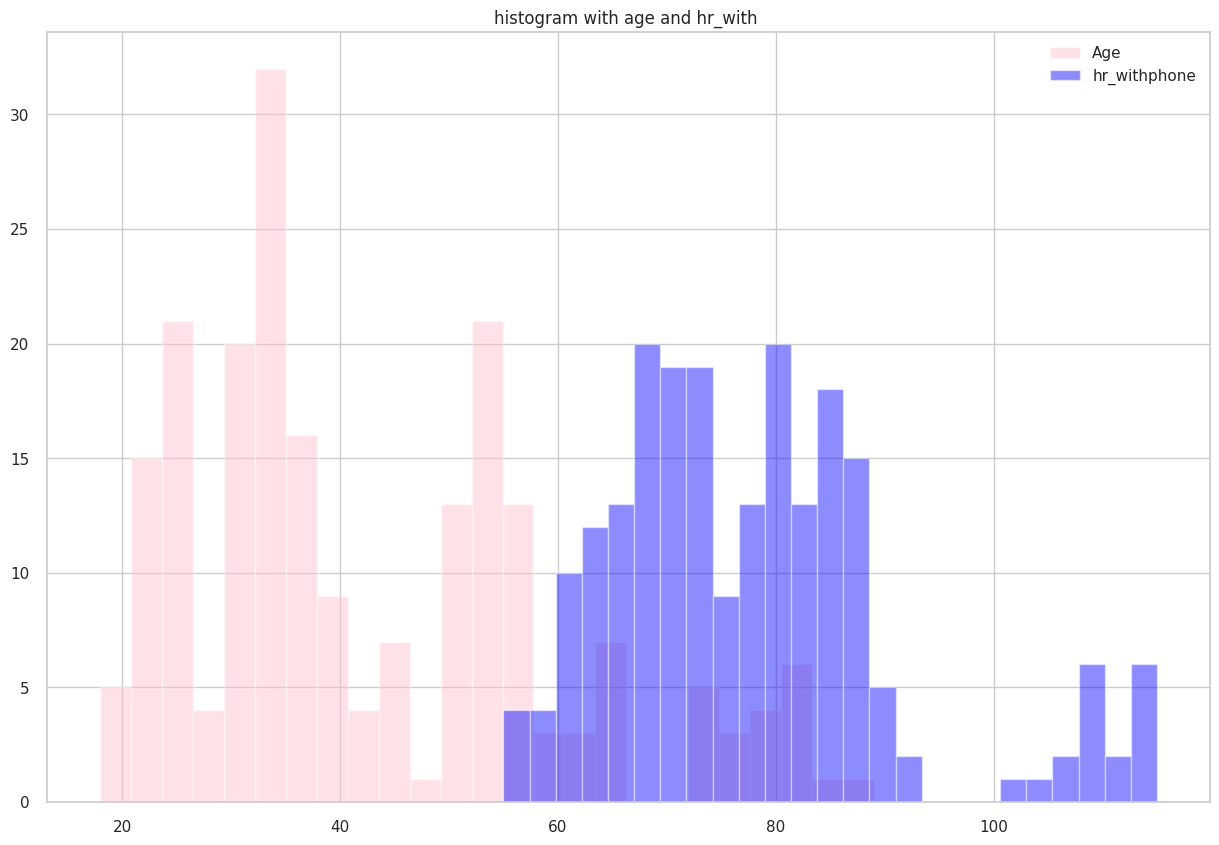

In [ ]:

fig = plt.figure(figsize=(15, 10))
plt.hist(df['age'], bins=25, alpha=0.45, color='pink')
plt.hist(df['hr_withphone'], bins=25, alpha=0.45, color='blue')

plt.title("histogram with age \
and hr_with ")

plt.legend(['Age',
            'hr_withphone'])

plt.show()

In [ ]:
df.columns

Index(['bp_withphone', 'bp_withoutphone', 'age', 'gender', 'hr_withphone',
       'hr_withoutphone', 'theta_easy', 'lower_alpha_easy', 'theta_hard',
       'lower_alpha_hard', 'Drivers_performance'],
      dtype='object')

In [ ]:
df['gender'].replace(['M','F'],[0,1],inplace=True)

In [ ]:
df1=df[['hr_withphone','hr_withoutphone','age','gender','Drivers_performance']]
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
df_out = df1[~((df1 < (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR))).any(axis=1)]
print('DF ', df.shape)
print('outliers removed',df_out.shape) #outliers removed


hr_withphone           16.0
hr_withoutphone        14.0
age                    22.0
gender                  1.0
Drivers_performance     1.0
dtype: float64
DF  (214, 11)
outliers removed (193, 5)


Feature Separation

In [ ]:
x=df_out[['hr_withphone','hr_withoutphone','age','gender']]
y = df_out['Drivers_performance']

In [ ]:
# --- Data Normalization using Min-Max Method ---


In [ ]:
# --- Splitting Dataset into 80:20 ---
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [ ]:
x_train

,hr_withphone,hr_withoutphone,age,gender
28,80,76,37,1
88,67,65,57,1
195,88,76,18,0
124,85,75,37,1
115,68,64,35,0
...,...,...,...,...
114,75,70,35,1
143,69,60,33,0
203,77,63,24,0
193,73,59,73,0


In [ ]:
x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)

In [ ]:
# --- Applying Logistic Regression ---
LRclassifier = LogisticRegression(random_state=1)
LRclassifier.fit(x_train,y_train)

y_pred_LR = LRclassifier.predict(x_test)

.:. Logistic Regression Accuracy: 48.72% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.40      0.11      0.17        19
           1       0.50      0.85      0.63        20

    accuracy                           0.49        39
   macro avg       0.45      0.48      0.40        39
weighted avg       0.45      0.49      0.40        39


.: Performance Evaluation
**************************


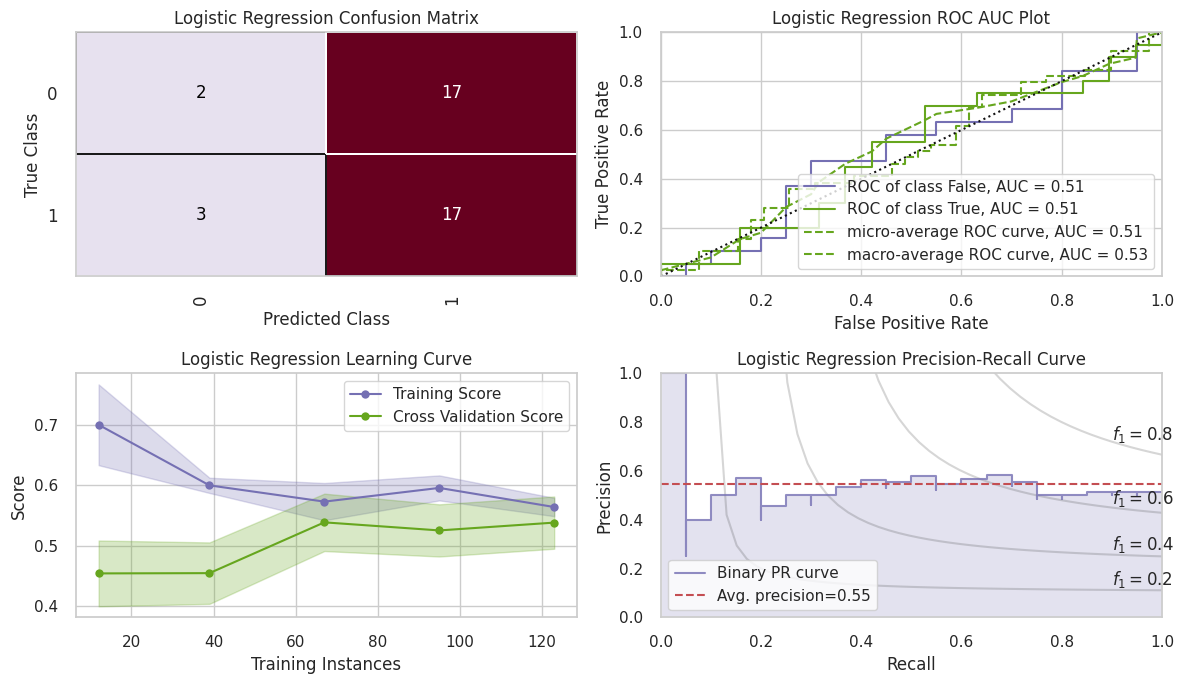

In [ ]:
# --- LR Accuracy ---
LRAcc = accuracy_score(y_test,y_pred_LR)
print('.:. Logistic Regression Accuracy:'+'\033[1m {:.2f}%'.format(LRAcc*100)+' .:.')

# --- LR Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_LR))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 7))

# --- LR Confusion Matrix ---
logmatrix = ConfusionMatrix(LRclassifier, ax=ax1, cmap='PuRd',
                            title='Logistic Regression Confusion Matrix')
logmatrix.fit(x_train, y_train)
logmatrix.score(x_test, y_test)
logmatrix.finalize()

# --- LR ROC AUC ---
logrocauc = ROCAUC(LRclassifier, classes=['False', 'True'], ax=ax2,
                   title='Logistic Regression ROC AUC Plot')
logrocauc.fit(x_train, y_train)
logrocauc.score(x_test, y_test)
logrocauc.finalize()

# --- LR Learning Curve ---
loglc = LearningCurve(LRclassifier, ax=ax3, title='Logistic Regression Learning Curve')
loglc.fit(x_train, y_train)
loglc.finalize()

# --- LR Precision Recall Curve ---
logcurve = PrecisionRecallCurve(LRclassifier, ax=ax4, ap_score=True, iso_f1_curves=True,
                                title='Logistic Regression Precision-Recall Curve')
logcurve.fit(x_train, y_train)
logcurve.score(x_test, y_test)
logcurve.finalize()

plt.tight_layout();

In [ ]:



from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=19)
knn = knn.fit(x_train,y_train)
score = knn.score(x_test,y_test)
y_pred_KNN = knn.predict(x_test)
score

0.717948717948718

Text(0, 0.5, 'Mean Error')

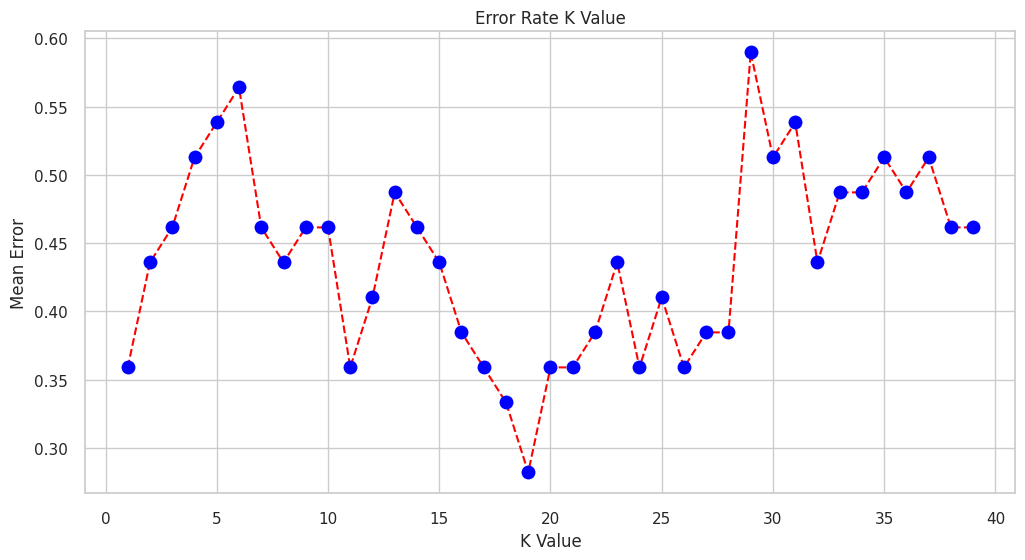

In [ ]:
error = []
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

.:. K-Nearest Neighbour Accuracy: 71.79% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.75      0.63      0.69        19
           1       0.70      0.80      0.74        20

    accuracy                           0.72        39
   macro avg       0.72      0.72      0.71        39
weighted avg       0.72      0.72      0.72        39


.: Performance Evaluation
**************************


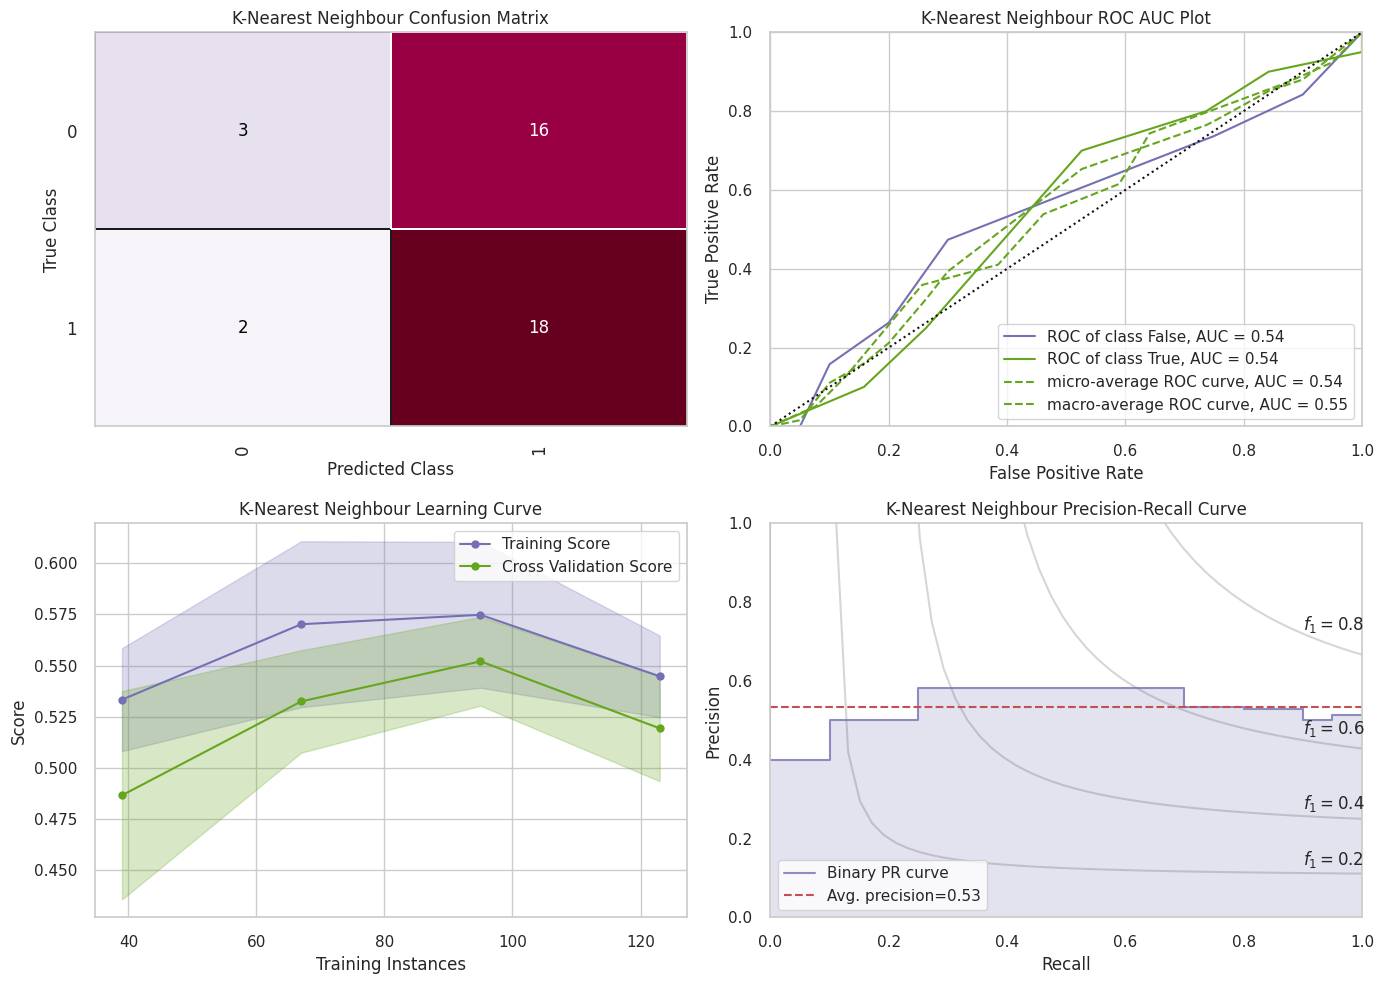

In [ ]:
# --- KNN Accuracy ---
KNNAcc = accuracy_score(y_pred_KNN, y_test)
print('.:. K-Nearest Neighbour Accuracy:'+'\033[1m {:.2f}%'.format(KNNAcc*100)+' .:.')

# --- KNN Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_KNN))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- KNN Confusion Matrix ---
knnmatrix = ConfusionMatrix(knn, ax=ax1, cmap='PuRd',
                            title='K-Nearest Neighbour Confusion Matrix')
knnmatrix.fit(x_train, y_train)
knnmatrix.score(x_test, y_test)
knnmatrix.finalize()

# --- KNN ROC AUC ---
knnrocauc = ROCAUC(knn, classes=['False', 'True'], ax=ax2,
                   title='K-Nearest Neighbour ROC AUC Plot')
knnrocauc.fit(x_train, y_train)
knnrocauc.score(x_test, y_test)
knnrocauc.finalize()

# --- KNN Learning Curve ---
knnlc = LearningCurve(knn, ax=ax3, title='K-Nearest Neighbour Learning Curve')
knnlc.fit(x_train, y_train)
knnlc.finalize()

# --- KNN Precision Recall Curve ---
knncurve = PrecisionRecallCurve(knn, ax=ax4, ap_score=True, iso_f1_curves=True,
                                 title='K-Nearest Neighbour Precision-Recall Curve')
knncurve.fit(x_train, y_train)
knncurve.score(x_test, y_test)
knncurve.finalize()

plt.tight_layout();

In [ ]:
# --- Applying SVM ---
SVMclassifier = SVC(kernel='rbf', max_iter=2000, C=10, probability=True)
SVMclassifier.fit(x_train, y_train)

y_pred_SVM = SVMclassifier.predict(x_test)

.:. Support Vector Machine Accuracy: 53.85% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.54      0.37      0.44        19
           1       0.54      0.70      0.61        20

    accuracy                           0.54        39
   macro avg       0.54      0.53      0.52        39
weighted avg       0.54      0.54      0.53        39


.: Performance Evaluation
**************************


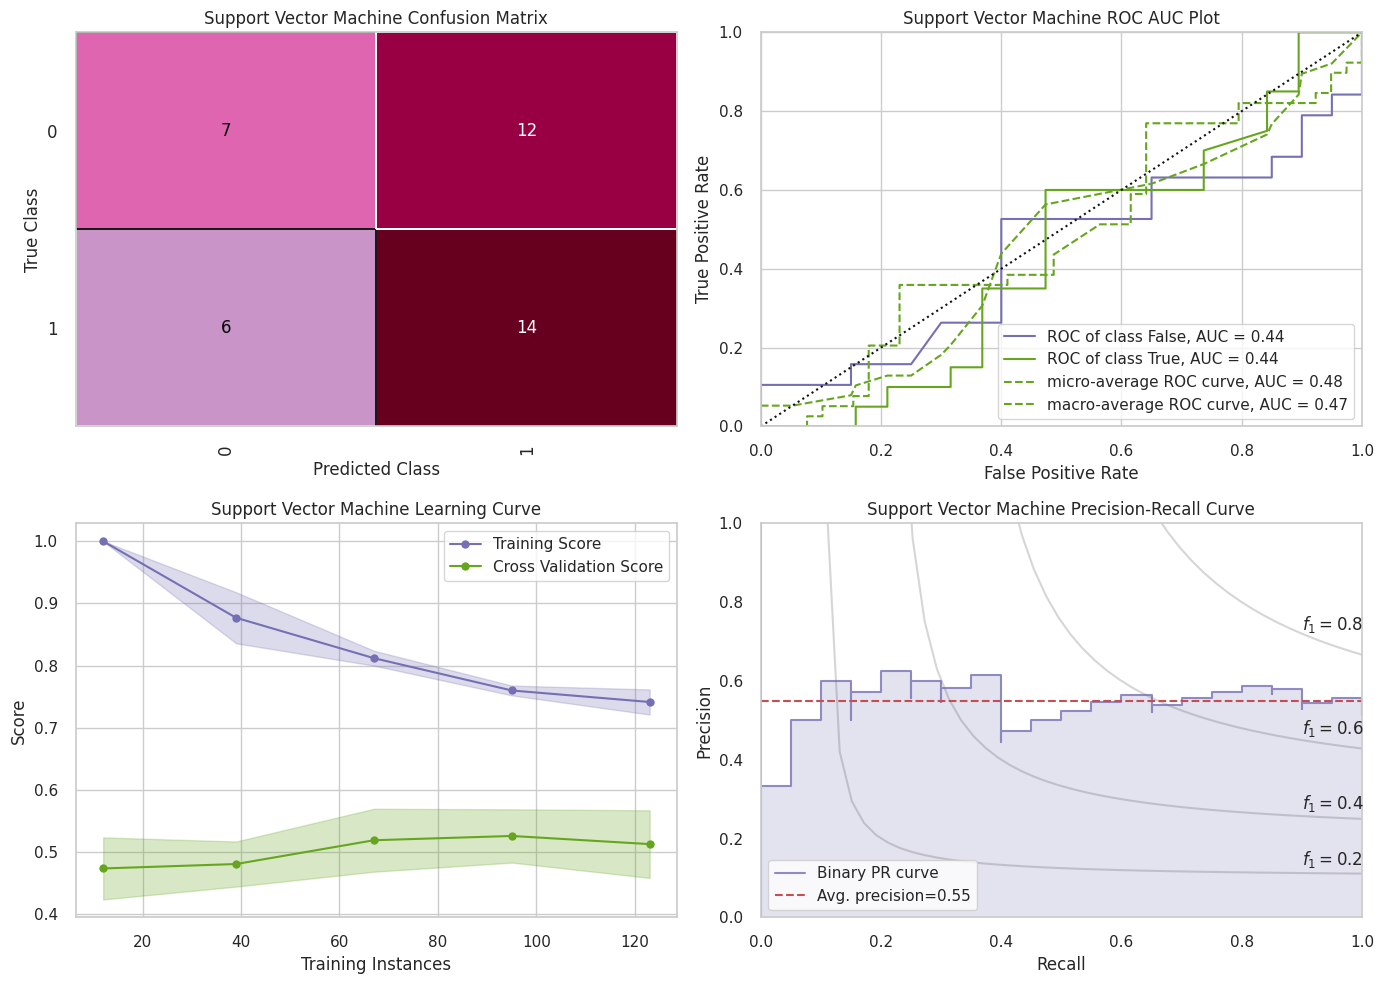

In [ ]:
# --- SVM Accuracy ---
SVMAcc = accuracy_score(y_pred_SVM, y_test)
print('.:. Support Vector Machine Accuracy:'+'\033[1m {:.2f}%'.format(SVMAcc*100)+' .:.')

# --- SVM Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_SVM))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- SVM Confusion Matrix ---
svmmatrix = ConfusionMatrix(SVMclassifier, ax=ax1, cmap='PuRd',
                            title='Support Vector Machine Confusion Matrix')
svmmatrix.fit(x_train, y_train)
svmmatrix.score(x_test, y_test)
svmmatrix.finalize()

# --- SVM ROC AUC ---
svmrocauc = ROCAUC(SVMclassifier, classes=['False', 'True'], ax=ax2,
                   title='Support Vector Machine ROC AUC Plot')
svmrocauc.fit(x_train, y_train)
svmrocauc.score(x_test, y_test)
svmrocauc.finalize()

# --- SVM Learning Curve ---
svmlc = LearningCurve(SVMclassifier, ax=ax3, title='Support Vector Machine Learning Curve')
svmlc.fit(x_train, y_train)
svmlc.finalize()

# --- SVM Precision Recall Curve ---
svmcurve = PrecisionRecallCurve(SVMclassifier, ax=ax4, ap_score=True, iso_f1_curves=True,
                                title='Support Vector Machine Precision-Recall Curve')
svmcurve.fit(x_train, y_train)
svmcurve.score(x_test, y_test)
svmcurve.finalize()

plt.tight_layout();

In [ ]:
# --- Applying Decision Tree ---
DTCclassifier = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, criterion='entropy', min_samples_split=5,
                                       splitter='random', random_state=1)

DTCclassifier.fit(x_train, y_train)
y_pred_DTC = DTCclassifier.predict(x_test)

.:. Decision Tree Accuracy: 53.85% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.56      0.26      0.36        19
           1       0.53      0.80      0.64        20

    accuracy                           0.54        39
   macro avg       0.54      0.53      0.50        39
weighted avg       0.54      0.54      0.50        39


.: Performance Evaluation
**************************


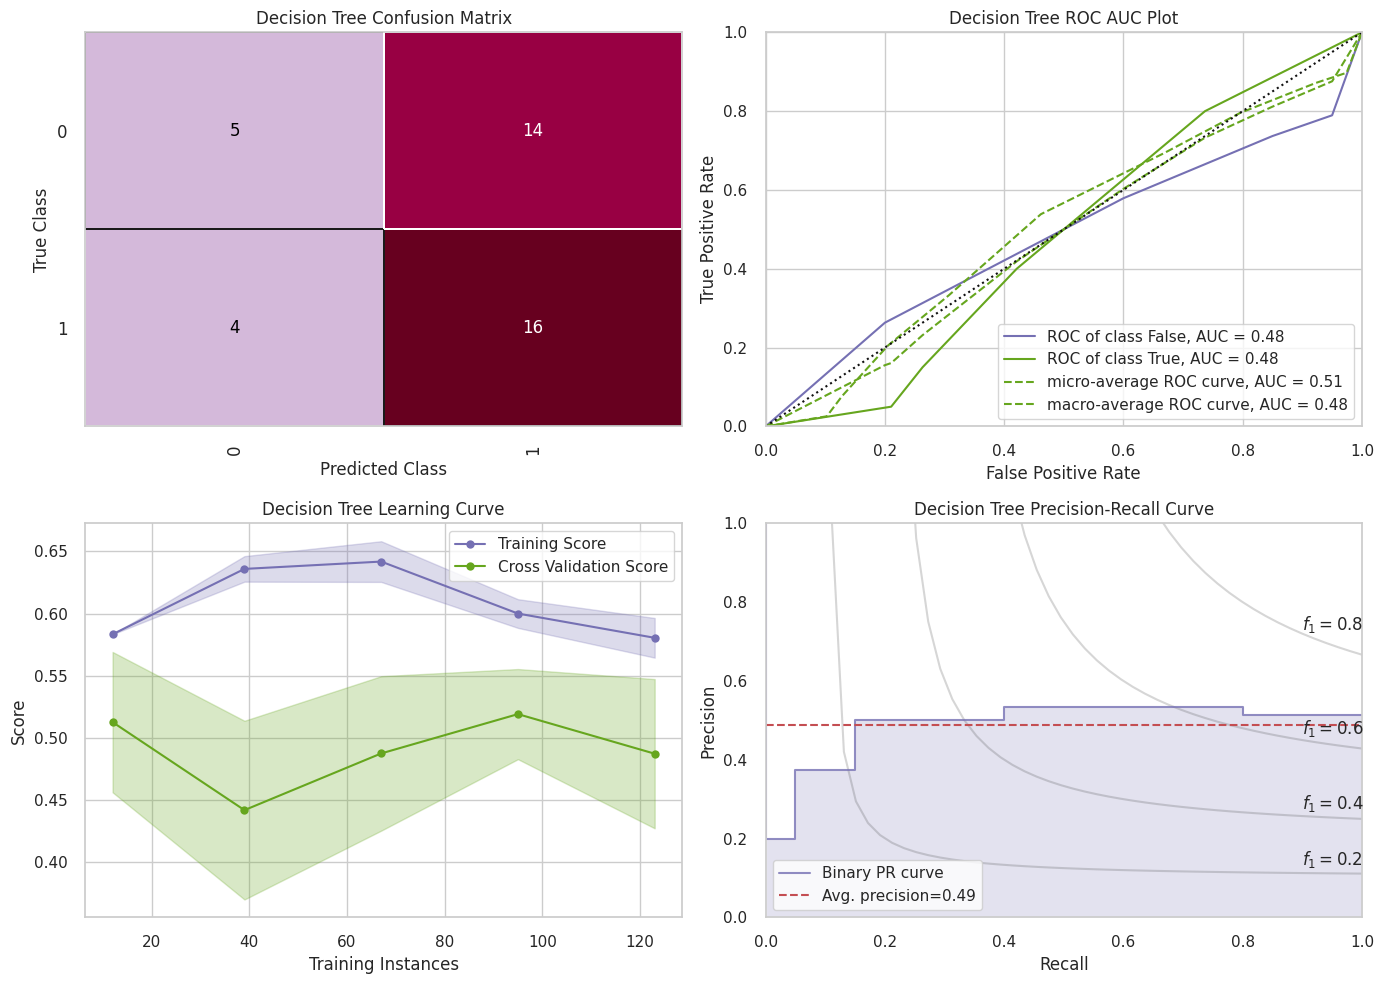

In [ ]:
# --- Decision Tree Accuracy ---
DTCAcc = accuracy_score(y_pred_DTC, y_test)
print('.:. Decision Tree Accuracy:'+'\033[1m {:.2f}%'.format(DTCAcc*100)+' .:.')

# --- Decision Tree Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_DTC))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- Decision Tree Confusion Matrix ---
dtcmatrix = ConfusionMatrix(DTCclassifier, ax=ax1, cmap='PuRd',
                            title='Decision Tree Confusion Matrix')
dtcmatrix.fit(x_train, y_train)
dtcmatrix.score(x_test, y_test)
dtcmatrix.finalize()

# --- Decision Tree ROC AUC ---
dtcrocauc = ROCAUC(DTCclassifier, classes=['False', 'True'], ax=ax2,
                   title='Decision Tree ROC AUC Plot')
dtcrocauc.fit(x_train, y_train)
dtcrocauc.score(x_test, y_test)
dtcrocauc.finalize()

# --- Decision Tree Learning Curve ---
dtclc = LearningCurve(DTCclassifier, ax=ax3, title='Decision Tree Learning Curve')
dtclc.fit(x_train, y_train)
dtclc.finalize()

# --- Decision Tree Precision Recall Curve ---
dtccurve = PrecisionRecallCurve(DTCclassifier, ax=ax4, ap_score=True, iso_f1_curves=True,
                                title='Decision Tree Precision-Recall Curve')
dtccurve.fit(x_train, y_train)
dtccurve.score(x_test, y_test)
dtccurve.finalize()

plt.tight_layout();

In [ ]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier()

forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,4))}]

clf = GridSearchCV(rfc, forest_params, cv = 8, scoring='accuracy')

clf.fit(x_train, y_train)

GridSearchCV(cv=8, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [10, 11, 12, 13, 14],
                          'max_features': [0, 1, 2, 3]}],
             scoring='accuracy')

In [ ]:

print(clf.best_params_)

print(clf.best_score_)

{'max_depth': 14, 'max_features': 2}
0.6098684210526315


**Neural Network implementation**

In [ ]:
#sijoos


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import tensorflow as tf
from tensorflow.keras.layers import Dropout

loss_fn = tf.keras.losses.BinaryCrossentropy()
model = Sequential()
# model.add(Dense(256, activation='relu', input_dim=10))
# model.add(Dropout(0.2))
model.add(Dense(128, activation='relu',input_dim=10))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(24, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
sgd = SGD(learning_rate=0.01, momentum=0.6)
model.compile(loss=loss_fn, optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 128)               1408      
                                                                 
 dropout_12 (Dropout)        (None, 128)               0         
                                                                 
 dense_16 (Dense)            (None, 64)                8256      
                                                                 
 dropout_13 (Dropout)        (None, 64)                0         
                                                                 
 dense_17 (Dense)            (None, 32)                2080      
                                                                 
 dropout_14 (Dropout)        (None, 32)                0         
                                                                 
 dense_18 (Dense)            (None, 24)               

In [ ]:
df_min_max_scaled = df.copy()

# apply normalization techniques
for column in df_min_max_scaled.columns:
    df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())

x = df_min_max_scaled.loc[:, df.columns != 'Drivers_performance']
y = df_min_max_scaled.loc[:, df.columns == 'Drivers_performance']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=4)


In [ ]:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=650, batch_size=8)

Epoch 1/650
24/24 [==============================] - 2s 17ms/step - loss: 0.6951 - accuracy: 0.5469 - val_loss: 0.6845 - val_accuracy: 0.5455
Epoch 2/650
24/24 [==============================] - 0s 5ms/step - loss: 0.6888 - accuracy: 0.5417 - val_loss: 0.6877 - val_accuracy: 0.5455
Epoch 3/650
24/24 [==============================] - 0s 6ms/step - loss: 0.6859 - accuracy: 0.5521 - val_loss: 0.6890 - val_accuracy: 0.5455
Epoch 4/650
24/24 [==============================] - 0s 6ms/step - loss: 0.6965 - accuracy: 0.5417 - val_loss: 0.6881 - val_accuracy: 0.5455
Epoch 5/650
24/24 [==============================] - 0s 5ms/step - loss: 0.6916 - accuracy: 0.5469 - val_loss: 0.6942 - val_accuracy: 0.5455
Epoch 6/650
24/24 [==============================] - 0s 6ms/step - loss: 0.6907 - accuracy: 0.5365 - val_loss: 0.6902 - val_accuracy: 0.5455
Epoch 7/650
24/24 [==============================] - 0s 5ms/step - loss: 0.6893 - accuracy: 0.5573 - val_loss: 0.6899 - val_accuracy: 0.5455
Epoch 8/650


[]

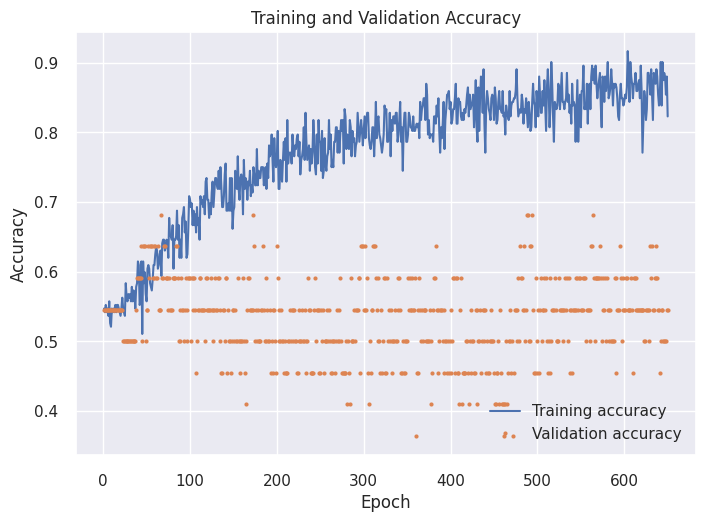

In [ ]:

sns.set()

acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, '.', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

1/1 [==============================] - 0s 98ms/step


<Axes: title={'center': 'Confusion matrix for neural network'}>

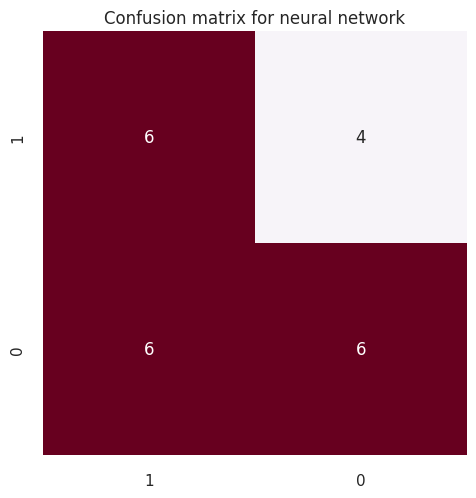

In [ ]:

from sklearn.metrics import confusion_matrix
y_predicted = model.predict(x_test) > 0.5
mat =confusion_matrix(y_test, y_predicted)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('Confusion matrix for neural network')
labels = ['1', '0']

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='PuRd',
            xticklabels=labels, yticklabels=labels)


In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score
y_pred_keras = model.predict(x_test)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)


1/1 [==============================] - 0s 25ms/step


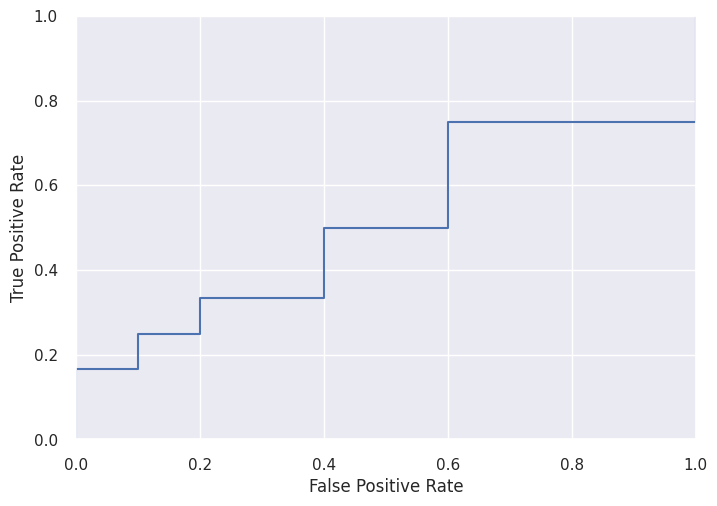

In [ ]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr,tpr)
  plt.axis([0,1,0,1])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.show()

plot_roc_curve (fpr_keras,tpr_keras)

In [ ]:
import sklearn
precision = sklearn.metrics.precision_score(y_test, y_predicted, pos_label=1.0)
print(precision)

0.6


In [ ]:

recall = sklearn.metrics.recall_score(y_test, y_predicted, pos_label=1.0)
print(recall)

0.5


In [ ]:
p=precision*recall
q=precision+recall




In [ ]:
f1= 2*(p/q)
print('F1 Score = ', f1)

F1 Score =  0.5454545454545454


1/1 [==============================] - 0s 30ms/step


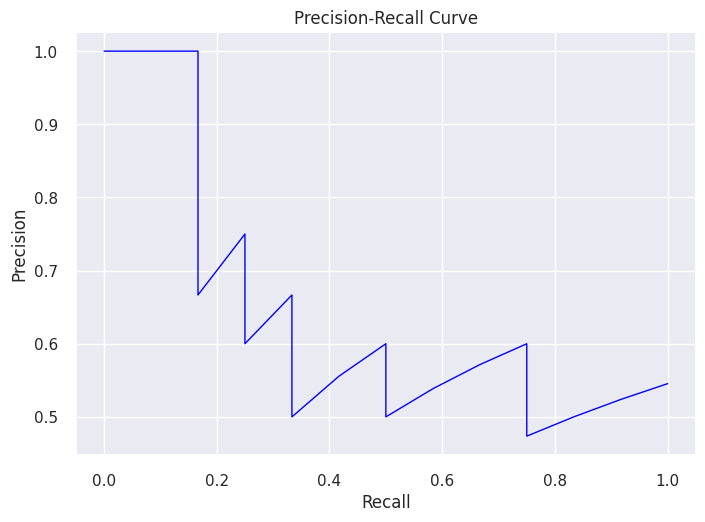

In [ ]:
import numpy as np
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Obtain predicted probabilities from validation set
y_pred_prob = model.predict(x_test)

# Set threshold and obtain predicted labels
threshold = 0.5
y_pred = (y_pred_prob > threshold).astype(int)

# Compute precision and recall for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob )

# Plot precision-recall curve
plt.plot(recall, precision, color='blue', lw=1)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


In [ ]:
ACC_NW=max(acc)

In [ ]:
# --- Create Accuracy Comparison Table ---
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K-Nearest Neighbour', 'Support Vector Machine','Decision Tree', 'ANN'],
                        'Accuracy': [LRAcc*100, KNNAcc*100, SVMAcc*100,DTCAcc*100,ACC_NW *100
                                     ]})

# --- Create Accuracy Comparison Table ---
compare.sort_values(by='Accuracy', ascending=False).style.background_gradient(cmap='PuRd').hide_index().set_properties(**{'font-family': 'Segoe UI'})

Model,Accuracy
ANN,91.666669
K-Nearest Neighbour,71.794872
Support Vector Machine,53.846154
Decision Tree,53.846154
Logistic Regression,48.717949
